Swiss-Energy-Analytics-Project-Soubhi-Saad

*Reading the Data and Cleaning*

In [ ]:
import pandas as pd

df = pd.read_excel("EnergieUebersichtCH-2024.xlsx", sheet_name="Zeitreihen0h15", engine="openpyxl")

df

,Unnamed: 0,Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock,Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock,Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock,Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid,Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid,Positive Sekundär-Regelenergie\nPositive secundary control energy,Negative Sekundär-Regelenergie\nNegative secundary control energy,Positive Tertiär-Regelenergie\nPositive tertiary control energy,Negative Tertiär-Regelenergie\nNegative tertiary control energy,...,"Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR","Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR","Produktion Kantone GE, VD\nProduction Cantons GE, VD","Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD","Produktion Kantone SH, ZH\nProduction Cantons SH, ZH","Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH",Produktion Kantonsübergreifend\nProduction across Cantons,Verbrauch Kantonsübergreifend\nConsumption across Cantons,Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories,Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories
0,Zeitstempel,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,...,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh,kWh
1,01.01.2024 00:15,1443841.995625,1296448.71,1939192.35146,604676.57354,854345.392,25,-3860,37500,0,...,10894.643,27995.643,41352.81,229333.429,22468.38,251422.561,119689.268,36427.03346,3084.08,11931.964
2,01.01.2024 00:30,1442365.748625,1294126.969,1921877.642453,592319.128547,852382.105,252,-1382,37500,0,...,10760.79,27521.791,41058.415,224283.806,22550.21,252227.424,120907.426,33431.673453,2418.287,11990.99
3,01.01.2024 00:45,1432568.28125,1289417.659,1914424.912363,590134.979637,854552.292,160,-3759,37500,0,...,11102.976,27440.977,40457.555,222318.856,22291.411,248822.329,120503.211,32682.266363,2948.361,11757.277
4,01.01.2024 01:00,1420472.128625,1284384.421,1917196.437713,594518.189287,855755.833,0,-7382,37500,0,...,14573.546,26529.546,39970.835,219582.402,22366.316,247489.263,121617.803,36437.505713,3329.06,11553.676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35132,31.12.2024 23:00,1658572.147875,1394786.537,1914907.706,464859.433,1004053.324,18640,0,25000,0,...,11363.654,33108.656,29284.037,295301.93,21410.361,289908.017,83574.729,61013.12,4506.399,16228.868
35133,31.12.2024 23:15,1678173.6355,1396248.145,1918393.551,467986.491,1004053.324,26260,0,49500,0,...,10755.063,33074.064,28434.331,277794.952,21299.225,289247.23,82809.332,60003.282,4395.872,17059.528
35134,31.12.2024 23:30,1659393.91225,1376701.237,1896931.611,467692.906,987233.324,26550,0,29500,0,...,10305.293,32217.294,27837.84,275057.392,21630.789,283209.324,82436.676,58191.527,4370.062,16660.69
35135,31.12.2024 23:45,1649246.932875,1368492.955,1884667.3,467088.339,979703.324,9091,-11,39500,0,...,10662.629,32367.631,27547.425,272048.543,21647.586,278642.943,81622.031,55380.398,4137.295,16340.605


In [63]:
df.rename(columns={df.columns[0]: "timestamp"}, inplace=True)

In [64]:
print(df.dtypes)


timestamp                                                                                                        object
Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock    object
Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock                         object
Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock                        object
Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid                   object
                                                                                                                  ...  
Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH                                                             object
Produktion Kantonsübergreifend\nProduction across Cantons                                                        object
Verbrauch Kantonsübergreifend\nConsumpti

In [ ]:
# Renommer la première colonne
df.rename(columns={df.columns[0]: "timestamp"}, inplace=True)

# Convertir la colonne date
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%d.%m.%Y %H:%M", errors="coerce")

# Convertir toutes les autres colonnes en nombres
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [66]:
print(df.dtypes)

timestamp                                                                                                        datetime64[ns]
Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock           float64
Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock                                float64
Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock                               float64
Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid                          float64
                                                                                                                      ...      
Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH                                                                    float64
Produktion Kantonsübergreifend\nProduction across Cantons                                               

In [ ]:
# 1. Supprimer les lignes vides
df = df.dropna(how="all")

# 2. Renommer la 1ère colonne
df = df.rename(columns={df.columns[0]: "timestamp"})

# 3. Convertir timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# 4. Supprimer les lignes sans timestamp
df = df.dropna(subset=["timestamp"])

# 5. Conversion des colonnes numériques
cols_to_convert = df.columns.drop("timestamp")
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors="coerce")

# Aperçu final
df.info()
df


<class 'pandas.core.frame.DataFrame'>
Index: 35136 entries, 1 to 35136
Data columns (total 65 columns):
 #   Column                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                        --------------  -----         
 0   timestamp                                                                                                     35136 non-null  datetime64[ns]
 1   Summe endverbrauchte Energie Regelblock Schweiz
Total energy consumed by end users in the Swiss controlblock  35136 non-null  float64       
 2   Summe produzierte Energie Regelblock Schweiz
Total energy production Swiss controlblock                       35136 non-null  float64       
 3   Summe verbrauchte Energie Regelblock Schweiz
Total energy consumption Swiss controlblock                      35136 non-null  float64       
 4   Netto Ausspeisu

,timestamp,Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock,Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock,Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock,Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid,Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid,Positive Sekundär-Regelenergie\nPositive secundary control energy,Negative Sekundär-Regelenergie\nNegative secundary control energy,Positive Tertiär-Regelenergie\nPositive tertiary control energy,Negative Tertiär-Regelenergie\nNegative tertiary control energy,...,"Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR","Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR","Produktion Kantone GE, VD\nProduction Cantons GE, VD","Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD","Produktion Kantone SH, ZH\nProduction Cantons SH, ZH","Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH",Produktion Kantonsübergreifend\nProduction across Cantons,Verbrauch Kantonsübergreifend\nConsumption across Cantons,Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories,Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories
1,2024-01-01 00:15:00,1.443842e+06,1296448.710,1.939192e+06,604676.573540,854345.392,25.0,-3860.0,37500.0,0.0,...,10894.643,27995.643,41352.810,229333.429,22468.380,251422.561,119689.268,36427.033460,3084.080,11931.964
2,2024-01-01 00:30:00,1.442366e+06,1294126.969,1.921878e+06,592319.128547,852382.105,252.0,-1382.0,37500.0,0.0,...,10760.790,27521.791,41058.415,224283.806,22550.210,252227.424,120907.426,33431.673453,2418.287,11990.990
3,2024-01-01 00:45:00,1.432568e+06,1289417.659,1.914425e+06,590134.979637,854552.292,160.0,-3759.0,37500.0,0.0,...,11102.976,27440.977,40457.555,222318.856,22291.411,248822.329,120503.211,32682.266363,2948.361,11757.277
4,2024-01-01 01:00:00,1.420472e+06,1284384.421,1.917196e+06,594518.189287,855755.833,0.0,-7382.0,37500.0,0.0,...,14573.546,26529.546,39970.835,219582.402,22366.316,247489.263,121617.803,36437.505713,3329.060,11553.676
5,2024-01-01 01:15:00,1.445856e+06,1291409.092,1.970522e+06,642303.570950,845762.397,3550.0,-193.0,35000.0,0.0,...,15080.385,27471.388,40153.339,234451.050,23566.420,245579.158,132227.077,33732.201050,3190.238,11922.976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35132,2024-12-31 23:00:00,1.658572e+06,1394786.537,1.914908e+06,464859.433000,1004053.324,18640.0,0.0,25000.0,0.0,...,11363.654,33108.656,29284.037,295301.930,21410.361,289908.017,83574.729,61013.120000,4506.399,16228.868
35133,2024-12-31 23:15:00,1.678174e+06,1396248.145,1.918394e+06,467986.491000,1004053.324,26260.0,0.0,49500.0,0.0,...,10755.063,33074.064,28434.331,277794.952,21299.225,289247.230,82809.332,60003.282000,4395.872,17059.528
35134,2024-12-31 23:30:00,1.659394e+06,1376701.237,1.896932e+06,467692.906000,987233.324,26550.0,0.0,29500.0,0.0,...,10305.293,32217.294,27837.840,275057.392,21630.789,283209.324,82436.676,58191.527000,4370.062,16660.690
35135,2024-12-31 23:45:00,1.649247e+06,1368492.955,1.884667e+06,467088.339000,979703.324,9091.0,-11.0,39500.0,0.0,...,10662.629,32367.631,27547.425,272048.543,21647.586,278642.943,81622.031,55380.398000,4137.295,16340.605


In [68]:

# Statistiques globales
df.describe()


,timestamp,Summe endverbrauchte Energie Regelblock Schweiz\nTotal energy consumed by end users in the Swiss controlblock,Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock,Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock,Netto Ausspeisung aus dem Übertragungsnetz Schweiz\nNet outflow of the Swiss transmission grid,Vertikale Einspeisung ins Übertragungsnetz Schweiz\nGrid feed-in Swiss transmission grid,Positive Sekundär-Regelenergie\nPositive secundary control energy,Negative Sekundär-Regelenergie\nNegative secundary control energy,Positive Tertiär-Regelenergie\nPositive tertiary control energy,Negative Tertiär-Regelenergie\nNegative tertiary control energy,...,"Produktion Kantone OW, NW, UR\nProduction Cantons OW, NW, UR","Verbrauch Kantone OW, NW, UR\nConsumption Cantons OW, NW, UR","Produktion Kantone GE, VD\nProduction Cantons GE, VD","Verbrauch Kantone GE, VD\nConsumption Cantons GE, VD","Produktion Kantone SH, ZH\nProduction Cantons SH, ZH","Verbrauch Kantone SH, ZH\nConsumption Cantons SH, ZH",Produktion Kantonsübergreifend\nProduction across Cantons,Verbrauch Kantonsübergreifend\nConsumption across Cantons,Produktion Regelzone CH - Ausländische Gebiete\nProduction control area CH - foreign territories,Verbrauch Regelzone CH - Ausländische Gebiete\nConsumption control area CH - foreign territories
count,35136,3.513600e+04,3.513600e+04,3.513600e+04,35136.000000,3.513600e+04,35136.000000,35136.000000,35136.000000,35136.000000,...,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000,35136.000000
mean,2024-07-02 00:41:55.573770752,1.518929e+06,2.150649e+06,1.753947e+06,77208.623062,1.544289e+06,4735.695042,-4917.857753,22674.700250,-10914.608493,...,42004.403726,23643.628683,87884.691591,208106.724351,31506.568122,260513.729586,111451.826267,49179.564320,5657.259650,18113.273444
min,2024-01-01 00:15:00,8.924723e+05,1.161932e+06,1.060860e+06,0.000000,5.794403e+05,0.000000,-142043.000000,0.000000,-339500.000000,...,4200.887000,12099.717000,26066.857000,122770.242000,15676.234000,156785.210000,49029.170000,14661.051365,379.294000,4161.820000
25%,2024-04-01 13:11:15,1.298713e+06,1.665908e+06,1.570648e+06,0.000000,1.093361e+06,226.000000,-5282.250000,0.000000,-12500.000000,...,19730.173750,19631.226000,62170.901750,178491.884500,21686.641500,221799.896750,92382.443750,39299.960179,3882.592750,15155.409250
50%,2024-07-02 01:07:30,1.499356e+06,2.062526e+06,1.765575e+06,0.000000,1.430796e+06,919.000000,-1163.000000,2500.000000,0.000000,...,38025.160000,23098.037500,81461.415000,209064.665500,23673.182500,259071.765000,111231.527500,48673.879935,5307.968500,17892.766500
75%,2024-10-01 13:03:45,1.709920e+06,2.584128e+06,1.937699e+06,53401.379835,1.940138e+06,5105.250000,-319.000000,29000.000000,0.000000,...,61774.780500,27375.709500,112345.164250,236901.486000,32785.093250,293756.695750,128258.609250,58546.234806,7036.749750,21107.010500
max,2025-01-01 00:00:00,2.366414e+06,3.849403e+06,2.503510e+06,849838.789101,3.094207e+06,116321.000000,0.000000,411250.000000,0.000000,...,109045.219000,40910.722000,211929.077000,339779.299000,112203.408000,397505.610000,207627.065000,106581.614086,16543.338000,31311.352000
std,NaN,2.870951e+05,5.721511e+05,2.665411e+05,156905.351589,5.285120e+05,8871.562986,9031.579713,39031.717758,23619.703015,...,24951.900172,5313.865901,33526.441749,40970.624255,17833.831464,48654.453067,25125.225986,13048.753162,2632.271074,4220.679438


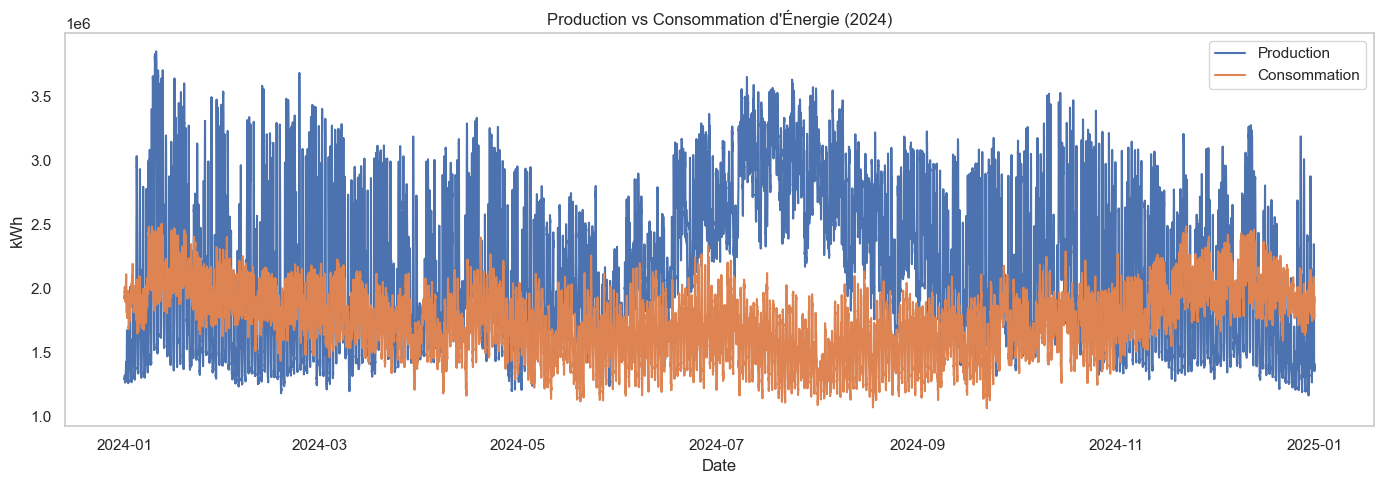

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.plot(df["timestamp"], df["Summe produzierte Energie Regelblock Schweiz\nTotal energy production Swiss controlblock"], label="Production")
plt.plot(df["timestamp"], df["Summe verbrauchte Energie Regelblock Schweiz\nTotal energy consumption Swiss controlblock"], label="Consommation")

plt.title("Production vs Consommation d'Énergie (2024)")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [70]:
import pandas as pd

# Lire le fichier Excel et la bonne feuille
df = pd.read_excel("EnergieUebersichtCH-2024.xlsx", sheet_name="Zeitreihen0h15")

# Renommer les colonnes pour que ce soit plus lisible
df = df.rename(columns={
    df.columns[0]: "timestamp",
    df.columns[1]: "final_energy_consumed",  # endverbrauchte
    df.columns[2]: "total_energy_produced",  # produzierte
    df.columns[3]: "total_energy_consumed", # verbrauchte
    df.columns[57]: "Production Cantons GE, VD",
    df.columns[58]: "Consumption Cantons GE, VD",
    df.columns[19]: "import",
    df.columns[20]: "export"
})

# Garder seulement les colonnes nécessaires
df = df[["timestamp", "final_energy_consumed", "total_energy_produced", "total_energy_consumed", "Production Cantons GE, VD", "Consumption Cantons GE, VD", "import", "export"]]

# Enlever les lignes avec valeurs manquantes
df = df.dropna(subset=["timestamp"])


# Voir un aperçu
df.head()

,timestamp,final_energy_consumed,total_energy_produced,total_energy_consumed,"Production Cantons GE, VD","Consumption Cantons GE, VD",import,export
0,Zeitstempel,kWh,kWh,kWh,kWh,kWh,kWh,kWh
1,01.01.2024 00:15,1443841.995625,1296448.71,1939192.35146,41352.81,229333.429,1089017,445459
2,01.01.2024 00:30,1442365.748625,1294126.969,1921877.642453,41058.415,224283.806,1055498,427292
3,01.01.2024 00:45,1432568.28125,1289417.659,1914424.912363,40457.555,222318.856,1058503,432527
4,01.01.2024 01:00,1420472.128625,1284384.421,1917196.437713,39970.835,219582.402,1101703,468150


In [71]:
df

,timestamp,final_energy_consumed,total_energy_produced,total_energy_consumed,"Production Cantons GE, VD","Consumption Cantons GE, VD",import,export
0,Zeitstempel,kWh,kWh,kWh,kWh,kWh,kWh,kWh
1,01.01.2024 00:15,1443841.995625,1296448.71,1939192.35146,41352.81,229333.429,1089017,445459
2,01.01.2024 00:30,1442365.748625,1294126.969,1921877.642453,41058.415,224283.806,1055498,427292
3,01.01.2024 00:45,1432568.28125,1289417.659,1914424.912363,40457.555,222318.856,1058503,432527
4,01.01.2024 01:00,1420472.128625,1284384.421,1917196.437713,39970.835,219582.402,1101703,468150
...,...,...,...,...,...,...,...,...
35132,31.12.2024 23:00,1658572.147875,1394786.537,1914907.706,29284.037,295301.93,1617168,1096043
35133,31.12.2024 23:15,1678173.6355,1396248.145,1918393.551,28434.331,277794.952,1588410,1064990
35134,31.12.2024 23:30,1659393.91225,1376701.237,1896931.611,27837.84,275057.392,1594412,1072974
35135,31.12.2024 23:45,1649246.932875,1368492.955,1884667.3,27547.425,272048.543,1528271,1010442


In [72]:
# Renommer proprement la première colonne
df = df.rename(columns={df.columns[0]: "timestamp"})

# Supprimer la première ligne si elle contient du texte
df = df.iloc[1:].reset_index(drop=True)

# Convertir timestamp en datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], dayfirst=True)


In [73]:
df.dtypes

timestamp                     datetime64[ns]
final_energy_consumed                 object
total_energy_produced                 object
total_energy_consumed                 object
Production Cantons GE, VD             object
Consumption Cantons GE, VD            object
import                                object
export                                object
dtype: object

In [74]:
# Liste des colonnes à convertir
numeric_cols = ["final_energy_consumed", "total_energy_produced", "total_energy_consumed", "Production Cantons GE, VD", "Consumption Cantons GE, VD", "import", "export"]

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(",", "")     # Enlève les virgules si présentes
        .str.replace(" ", "")     # Supprime les espaces
        .str.replace("\n", "")    # Supprime les retours à la ligne éventuels
        .replace("", None)        # Remplace vide par None (NaN)
        .astype(float)
    )

In [75]:
df.dtypes


timestamp                     datetime64[ns]
final_energy_consumed                float64
total_energy_produced                float64
total_energy_consumed                float64
Production Cantons GE, VD            float64
Consumption Cantons GE, VD           float64
import                               float64
export                               float64
dtype: object

In [76]:
df

,timestamp,final_energy_consumed,total_energy_produced,total_energy_consumed,"Production Cantons GE, VD","Consumption Cantons GE, VD",import,export
0,2024-01-01 00:15:00,1.443842e+06,1296448.710,1.939192e+06,41352.810,229333.429,1089017.0,445459.0
1,2024-01-01 00:30:00,1.442366e+06,1294126.969,1.921878e+06,41058.415,224283.806,1055498.0,427292.0
2,2024-01-01 00:45:00,1.432568e+06,1289417.659,1.914425e+06,40457.555,222318.856,1058503.0,432527.0
3,2024-01-01 01:00:00,1.420472e+06,1284384.421,1.917196e+06,39970.835,219582.402,1101703.0,468150.0
4,2024-01-01 01:15:00,1.445856e+06,1291409.092,1.970522e+06,40153.339,234451.050,1137269.0,457475.0
...,...,...,...,...,...,...,...,...
35131,2024-12-31 23:00:00,1.658572e+06,1394786.537,1.914908e+06,29284.037,295301.930,1617168.0,1096043.0
35132,2024-12-31 23:15:00,1.678174e+06,1396248.145,1.918394e+06,28434.331,277794.952,1588410.0,1064990.0
35133,2024-12-31 23:30:00,1.659394e+06,1376701.237,1.896932e+06,27837.840,275057.392,1594412.0,1072974.0
35134,2024-12-31 23:45:00,1.649247e+06,1368492.955,1.884667e+06,27547.425,272048.543,1528271.0,1010442.0


In [77]:
df["total_energy_consumed"].isnull().sum()

0

In [78]:
# Somme totale de consommation d'énergie sur l'année
total_consumed = df["total_energy_consumed"].sum()

# Regrouper par jour pour obtenir la moyenne par jour
df["date"] = df["timestamp"].dt.date
daily_avg = df.groupby("date")["total_energy_consumed"].sum().mean()

print(f"🔋 Consommation totale en 2024 : {total_consumed / 1e6:.2f} GWh")
print(f"📅 Moyenne quotidienne : {daily_avg / 1e6:.2f} GWh/jour")


🔋 Consommation totale en 2024 : 61626.68 GWh
📅 Moyenne quotidienne : 167.92 GWh/jour


In [79]:
df["date"] = df["timestamp"].dt.date
daily = df.groupby("date")["total_energy_consumed"].sum()
print(daily.head())



date
2024-01-01    1.831487e+08
2024-01-02    1.769622e+08
2024-01-03    1.907004e+08
2024-01-04    1.829214e+08
2024-01-05    1.835905e+08
Name: total_energy_consumed, dtype: float64


In [80]:
df

,timestamp,final_energy_consumed,total_energy_produced,total_energy_consumed,"Production Cantons GE, VD","Consumption Cantons GE, VD",import,export,date
0,2024-01-01 00:15:00,1.443842e+06,1296448.710,1.939192e+06,41352.810,229333.429,1089017.0,445459.0,2024-01-01
1,2024-01-01 00:30:00,1.442366e+06,1294126.969,1.921878e+06,41058.415,224283.806,1055498.0,427292.0,2024-01-01
2,2024-01-01 00:45:00,1.432568e+06,1289417.659,1.914425e+06,40457.555,222318.856,1058503.0,432527.0,2024-01-01
3,2024-01-01 01:00:00,1.420472e+06,1284384.421,1.917196e+06,39970.835,219582.402,1101703.0,468150.0,2024-01-01
4,2024-01-01 01:15:00,1.445856e+06,1291409.092,1.970522e+06,40153.339,234451.050,1137269.0,457475.0,2024-01-01
...,...,...,...,...,...,...,...,...,...
35131,2024-12-31 23:00:00,1.658572e+06,1394786.537,1.914908e+06,29284.037,295301.930,1617168.0,1096043.0,2024-12-31
35132,2024-12-31 23:15:00,1.678174e+06,1396248.145,1.918394e+06,28434.331,277794.952,1588410.0,1064990.0,2024-12-31
35133,2024-12-31 23:30:00,1.659394e+06,1376701.237,1.896932e+06,27837.840,275057.392,1594412.0,1072974.0,2024-12-31
35134,2024-12-31 23:45:00,1.649247e+06,1368492.955,1.884667e+06,27547.425,272048.543,1528271.0,1010442.0,2024-12-31


C:\Users\soubh\AppData\Local\Temp\ipykernel_19568\1518680714.py:20: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\soubh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


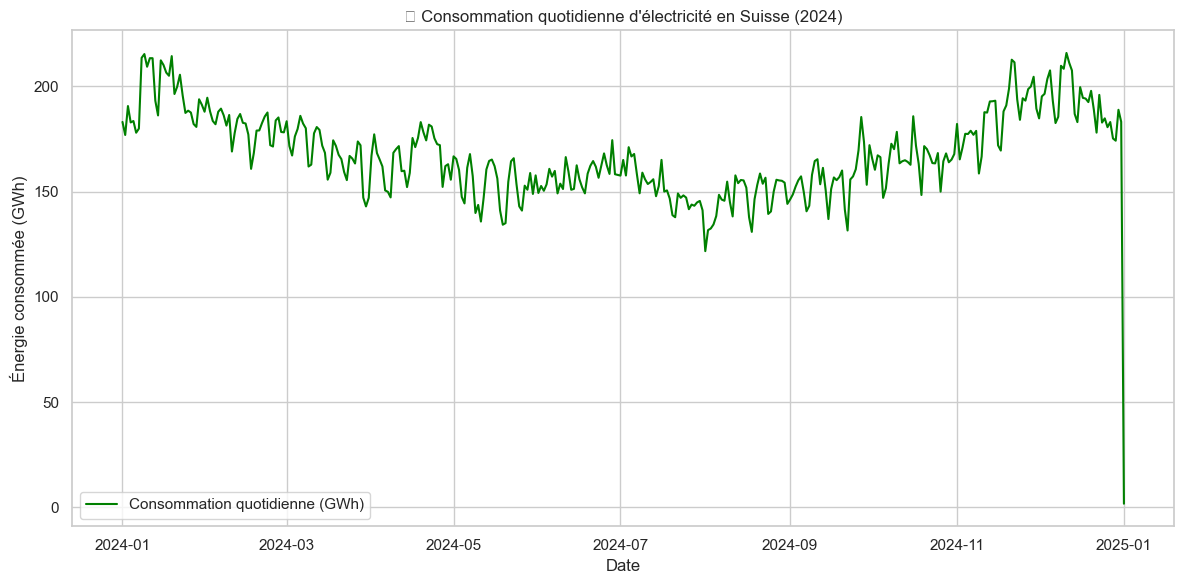

In [81]:
import matplotlib.pyplot as plt

# Regroupement par jour
daily_energy = df.groupby("date")["total_energy_consumed"].sum()

# ✅ Conversion en GWh
daily_energy_gwh = daily_energy / 1e6

# Supprimer éventuelles valeurs nulles
daily_energy_gwh = daily_energy_gwh[daily_energy_gwh > 0]

# Tracer
plt.figure(figsize=(12, 6))
plt.plot(daily_energy_gwh.index, daily_energy_gwh.values, label="Consommation quotidienne (GWh)", color="green")
plt.xlabel("Date")
plt.ylabel("Énergie consommée (GWh)")
plt.title("📈 Consommation quotidienne d'électricité en Suisse (2024)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [82]:
print(daily_energy_gwh.head())


date
2024-01-01    183.148737
2024-01-02    176.962246
2024-01-03    190.700392
2024-01-04    182.921450
2024-01-05    183.590472
Name: total_energy_consumed, dtype: float64


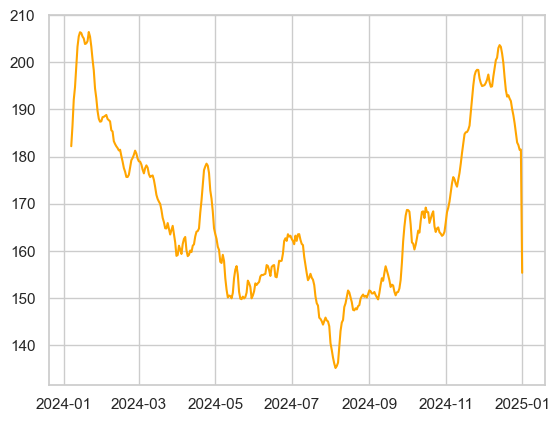

In [83]:
# Moyenne mobile sur 7 jours
rolling_avg = daily_energy_gwh.rolling(window=7).mean()

# Tracer la moyenne mobile
plt.plot(rolling_avg.index, rolling_avg.values, label="Moyenne mobile (7 jours)", color="orange")


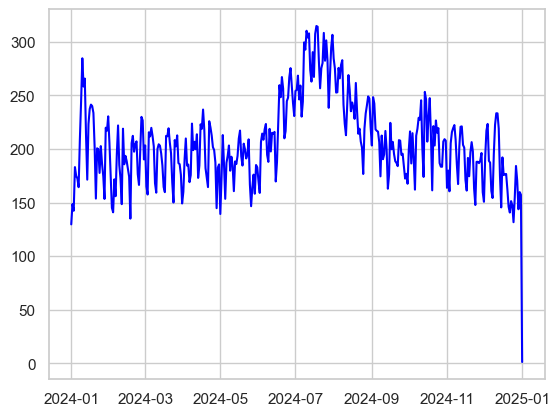

In [84]:
# Regrouper et convertir la production quotidienne en GWh
daily_production = df.groupby("date")["total_energy_produced"].sum() / 1e6

# Tracer la production
plt.plot(daily_production.index, daily_production.values, label="Production quotidienne (GWh)", color="blue")


In [86]:
DeMean = daily_energy_gwh.mean()
DeMedian = daily_energy_gwh.median()
DeSTD = daily_energy_gwh.std()

print(f"📊 Moyenne : {DeMean:.2f} GWh")
print(f"📊 Médiane : {DeMedian:.2f} GWh")
print(f"📊 Écart-type : {DeSTD:.2f} GWh")

📊 Moyenne : 167.92 GWh
📊 Médiane : 165.50 GWh
📊 Écart-type : 20.86 GWh


In [87]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for better plot styling
sns.set(style="whitegrid")

# Create helpful columns
df["net_energy"] = df["Production Cantons GE, VD"] - df["Consumption Cantons GE, VD"]
df["self_sufficiency"] = df["Production Cantons GE, VD"] / df["Consumption Cantons GE, VD"]


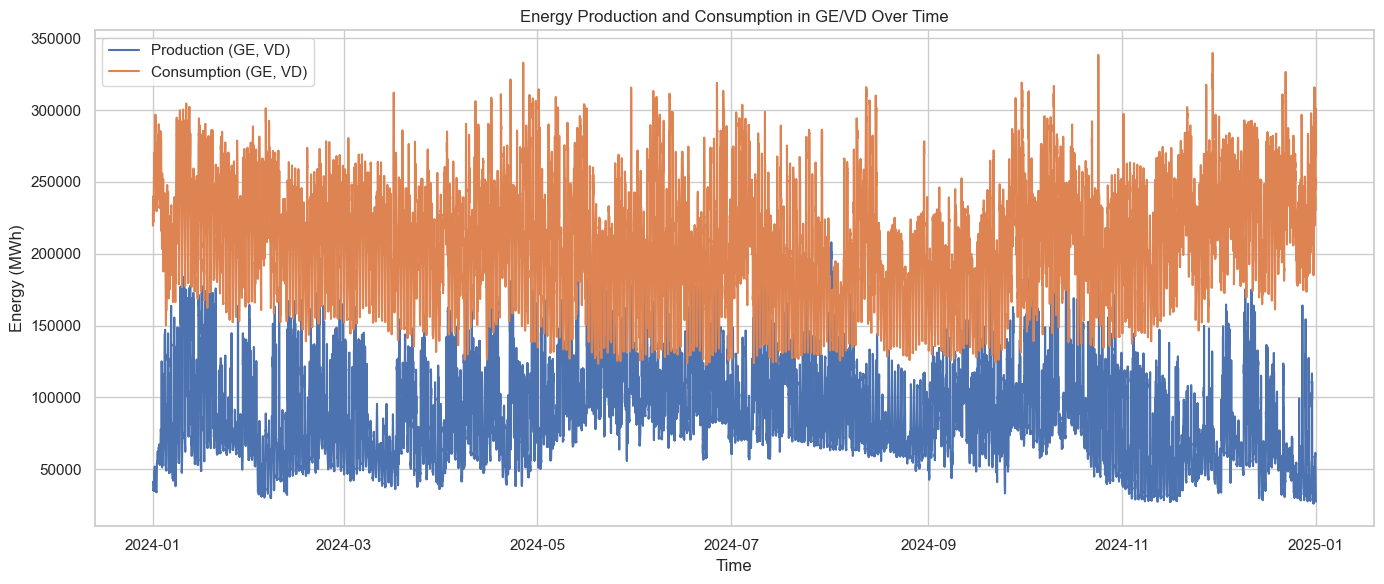

In [88]:
plt.figure(figsize=(14, 6))
plt.plot(df["timestamp"], df["Production Cantons GE, VD"], label="Production (GE, VD)")
plt.plot(df["timestamp"], df["Consumption Cantons GE, VD"], label="Consumption (GE, VD)")
plt.xlabel("Time")
plt.ylabel("Energy (MWh)")
plt.title("Energy Production and Consumption in GE/VD Over Time")
plt.legend()
plt.tight_layout()
plt.show()


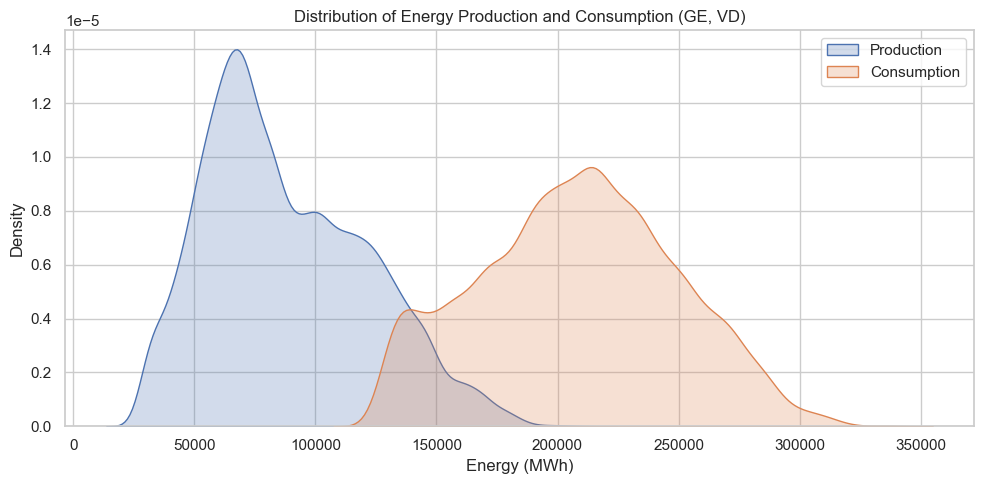

In [90]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df["Production Cantons GE, VD"], label="Production", fill=True)
sns.kdeplot(df["Consumption Cantons GE, VD"], label="Consumption", fill=True)
plt.title("Distribution of Energy Production and Consumption (GE, VD)")
plt.xlabel("Energy (MWh)")
plt.legend()
plt.tight_layout()
plt.show()


In [93]:
summary = df[["Production Cantons GE, VD", "Consumption Cantons GE, VD", "net_energy", "self_sufficiency"]].describe()
print(summary)


       Production Cantons GE, VD  Consumption Cantons GE, VD     net_energy  \
count               35136.000000                35136.000000   35136.000000   
mean                87884.691591               208106.724351 -120222.032761   
std                 33526.441749                40970.624255   46609.084945   
min                 26066.857000               122770.242000 -278525.926000   
25%                 62170.901750               178491.884500 -152579.030500   
50%                 81461.415000               209064.665500 -119978.779000   
75%                112345.164250               236901.486000  -87892.574250   
max                211929.077000               339779.299000   53092.536000   

       self_sufficiency  
count      35136.000000  
mean           0.432263  
std            0.170323  
min            0.099166  
25%            0.303540  
50%            0.410866  
75%            0.535257  
max            1.398742  


In [94]:
daily_df = df.groupby("date").agg({
    "Production Cantons GE, VD": "sum",
    "Consumption Cantons GE, VD": "sum",
    "net_energy": "sum",
    "self_sufficiency": "mean"  # Mean makes more sense for a ratio
}).reset_index()


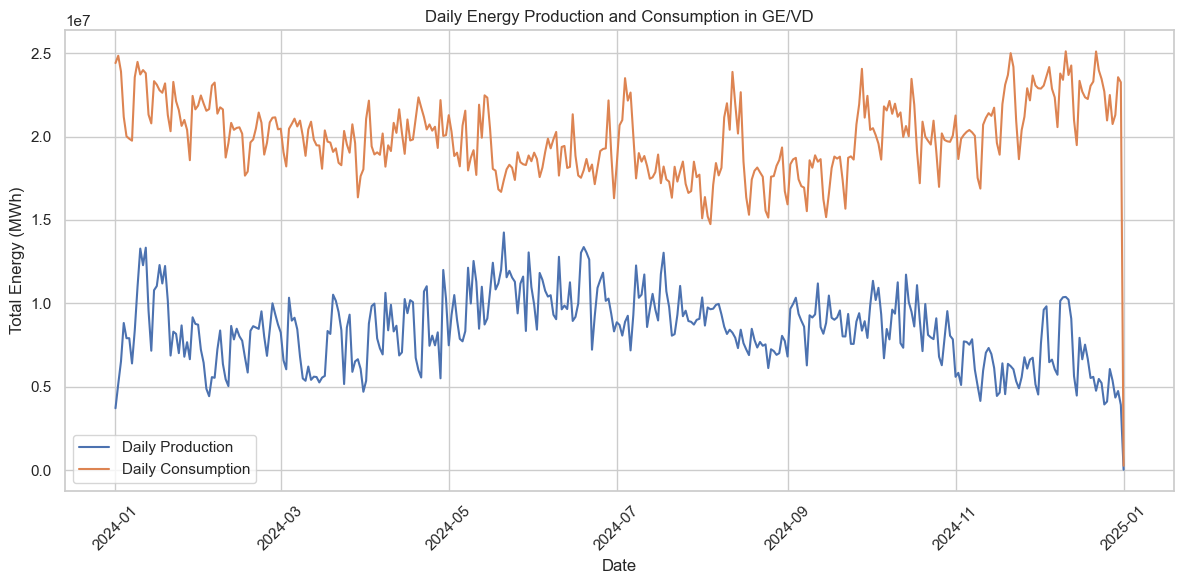

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(daily_df["date"], daily_df["Production Cantons GE, VD"], label="Daily Production")
plt.plot(daily_df["date"], daily_df["Consumption Cantons GE, VD"], label="Daily Consumption")
plt.xlabel("Date")
plt.ylabel("Total Energy (MWh)")
plt.title("Daily Energy Production and Consumption in GE/VD")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [98]:
daily_df = df.groupby("date").agg({
    "Production Cantons GE, VD": "sum",
    "Consumption Cantons GE, VD": "sum"
}).reset_index()


In [100]:
corr = daily_df["Production Cantons GE, VD"].corr(daily_df["Consumption Cantons GE, VD"])
print(f"Correlation: {corr:.2f}")


Correlation: -0.13


Quelle est la consommation totale d’énergie en 2024 ?

In [101]:
# Consommation totale en kWh
total_consumption_kwh = df["total_energy_consumed"].sum()

# Conversion en GWh (1 GWh = 1 million kWh)
total_consumption_gwh = total_consumption_kwh / 1_000_000

print(f"🔋 Consommation totale en 2024 : {total_consumption_gwh:.2f} GWh")


🔋 Consommation totale en 2024 : 61626.68 GWh


Cela correspond à 61,6 térawattheures (TWh).

C’est cohérent avec les chiffres officiels (Suisse consomme entre 55 et 65 TWh par an).

Ce total inclut probablement l’ensemble des usages nationaux (ménages, entreprises, industries, etc.).



Calculer la consommation moyenne quotidienne d’énergie en 2024.

In [102]:
# Extraire la date uniquement
df["date"] = df["timestamp"].dt.date

# Grouper par jour et sommer la consommation journalière
daily_consumption = df.groupby("date")["total_energy_consumed"].sum()

# Calculer la moyenne
average_daily_consumption = daily_consumption.mean()

# Afficher le résultat en GWh
print(f"📊 Consommation moyenne par jour en 2024 : {average_daily_consumption / 1_000_000:.2f} GWh/jour")


📊 Consommation moyenne par jour en 2024 : 167.92 GWh/jour


 Visualisation de la consommation par mois BarPlot

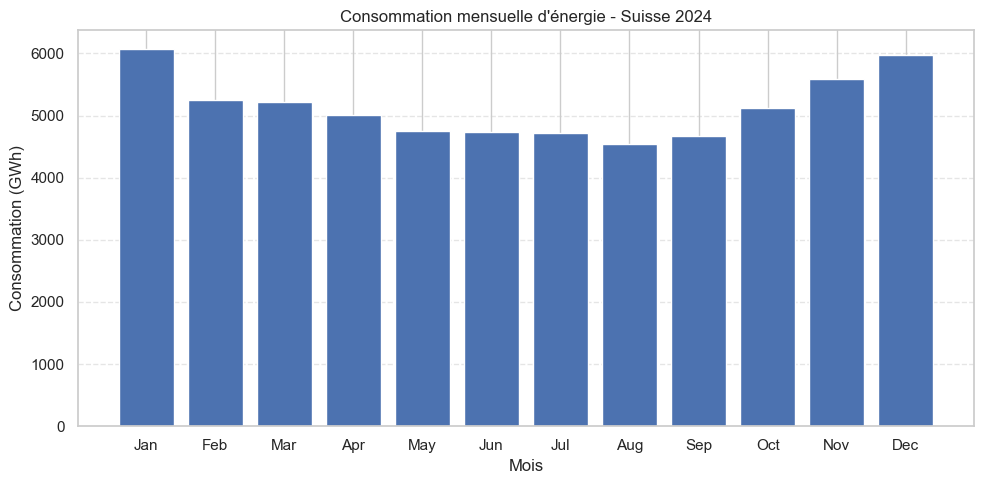

In [103]:
import matplotlib.pyplot as plt

# Extraire le mois sous forme numérique et texte
df["month"] = df["timestamp"].dt.month

# Consommation mensuelle (en GWh)
monthly_consumption = df.groupby("month")["total_energy_consumed"].sum() / 1_000_000

# Noms des mois pour l'affichage
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Tracer
plt.figure(figsize=(10,5))
plt.bar(months, monthly_consumption)
plt.title("Consommation mensuelle d'énergie - Suisse 2024")
plt.ylabel("Consommation (GWh)")
plt.xlabel("Mois")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Mois	                    Consommation relative
Janvier	                    🔺 Très élevée (hiver, chauffage électrique)
Février à Octobre	        🔻 Plus calme (printemps + été)
Novembre - Décembre	        🔺 Remontée (retour du froid)



------------------

Interprétation :
* En hiver, la demande explose à cause :

du chauffage électrique

de la réduction des heures d’ensoleillement

d’une activité industrielle soutenue

* L’été est plus calme, mais la consommation ne tombe pas à zéro, car :

climatisation (moins en Suisse, mais existe)

tourisme

consommation constante dans certains secteurs (hôpitaux, IT, etc.)


Comparer la consommation et la production d’énergie par mois

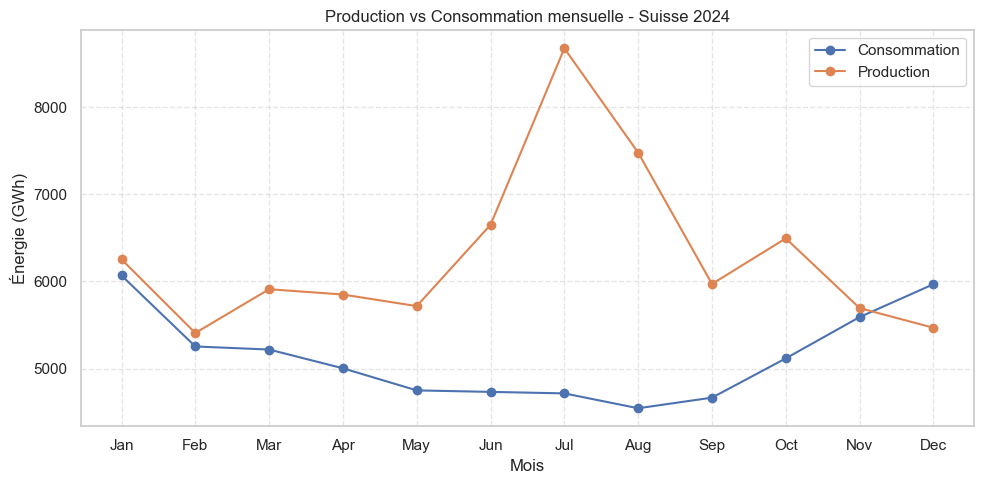

In [104]:
# Regrouper par mois
monthly_data = df.groupby("month")[["total_energy_consumed", "total_energy_produced"]].sum() / 1_000_000  # en GWh

# Affichage
plt.figure(figsize=(10, 5))
plt.plot(months, monthly_data["total_energy_consumed"], label="Consommation", marker='o')
plt.plot(months, monthly_data["total_energy_produced"], label="Production", marker='o')

plt.title("Production vs Consommation mensuelle - Suisse 2024")
plt.ylabel("Énergie (GWh)")
plt.xlabel("Mois")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


Interprétation possible :
Il y a un surplus énergétique durant l'été (surtout juillet), ce qui pourrait indiquer un excédent de production (hydroélectrique, solaire).

En hiver, la demande augmente (chauffage), tandis que la production baisse, créant un déficit énergétique potentiel.

En hiver, la Suisse achète surtout à la France et l’Allemagne, parfois à l’Italie ou l’Autriche.
En été, elle peut leur revendre de l’énergie excédentaire (surtout hydraulique).

Pourquoi la consommation dépasse la production en fin d’année (novembre-décembre) ?


Facteurs principaux :
Baisse des températures → plus de chauffage → la demande augmente fortement

Moins de soleil et de pluie → baisse de la production solaire et hydroélectrique

Jours plus courts → plus d’éclairage → augmentation de la consommation

Activités festives (Noël, fin d’année) → pics de consommation

Résultat : la consommation devient supérieure à la production nationale

✅ Calcul de la balance énergétique nette par mois

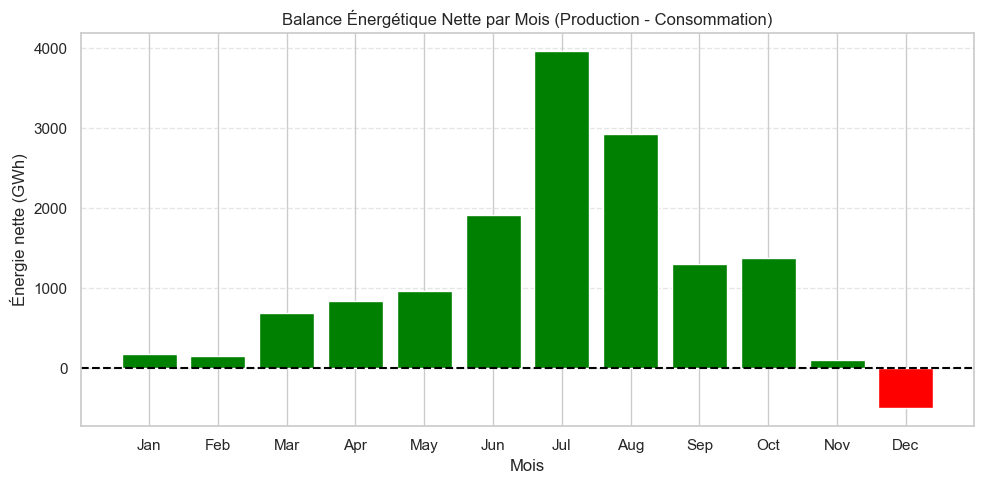

In [105]:
# Balance énergétique nette par mois (en GWh)
monthly_data["net_balance"] = monthly_data["total_energy_produced"] - monthly_data["total_energy_consumed"]

# Tracer la balance
plt.figure(figsize=(10, 5))
plt.bar(months, monthly_data["net_balance"], color=["green" if x >= 0 else "red" for x in monthly_data["net_balance"]])
plt.axhline(0, color='black', linestyle='--')

plt.title("Balance Énergétique Nette par Mois (Production - Consommation)")
plt.ylabel("Énergie nette (GWh)")
plt.xlabel("Mois")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Barres vertes = excédent de production (potentiel export)

Barres rouges = déficit → importation potentielle

✅ la Suisse a réellement importé et exporté mois par mois

In [ ]:
df["month"] = df["timestamp"].dt.month

# Sommes mensuelles (en GWh)
monthly_flux = df.groupby("month")[["import", "export"]].sum() / 1_000_000


C:\Users\soubh\AppData\Local\Temp\ipykernel_19568\823905271.py:11: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\soubh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


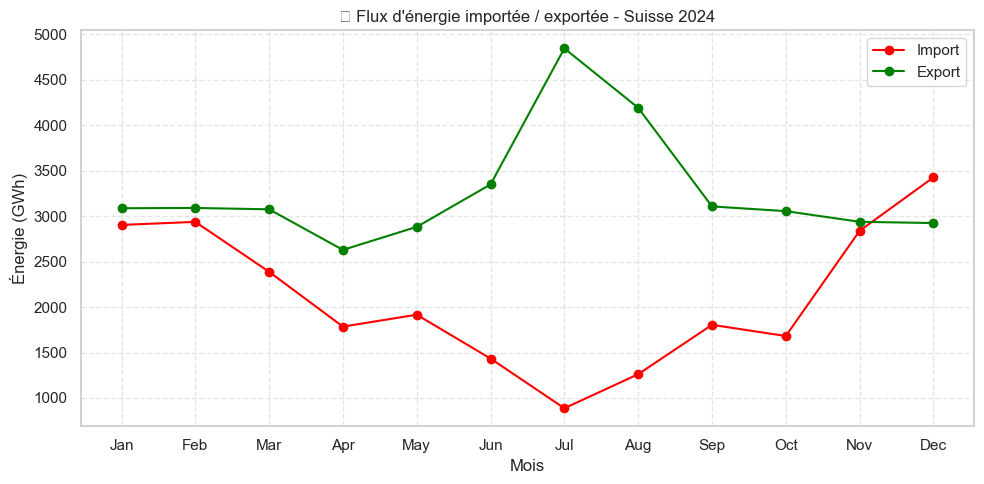

In [110]:
# Affichage
plt.figure(figsize=(10, 5))
plt.plot(months, monthly_flux["import"], label="Import", marker='o', color='red')
plt.plot(months, monthly_flux["export"], label="Export", marker='o', color='green')

plt.title("🌍 Flux d'énergie importée / exportée - Suisse 2024")
plt.ylabel("Énergie (GWh)")
plt.xlabel("Mois")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


🟥 Ligne rouge – Importation d’électricité :
Relativement élevée en janvier, février, novembre et surtout décembre

Très faible en été, surtout en juillet (moins de 1 000 GWh)

🟩 Ligne verte – Exportation d’électricité :
Forte entre mai et août, pic en juillet (près de 5 000 GWh)

Diminue en automne

En novembre et décembre, elle devient inférieure aux importations


conclution : ✅ 1. La Suisse est exportatrice en été :
De mai à août, la production d’électricité (surtout hydroélectrique) dépasse la consommation.

Cela permet à la Suisse d’exporter plus qu’elle n’importe → elle vend son surplus.

⚠️ 2. La Suisse devient importatrice en hiver :
En hiver (novembre et décembre), les importations dépassent les exportations.

Cela confirme que la production suisse ne suffit pas à couvrir la consommation en fin d’année.

Cela correspond aussi à la hausse de la consommation en hiver (vue dans ton autre graphique).

Key phrase :  Cela confirme que la Suisse n’est pas totalement autosuffisante en électricité sur l’année, même si elle produit beaucoup à certains moments.